<a href="https://colab.research.google.com/github/shadab4150/practice_projects/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/novel-corona-virus-2019-dataset.zip' -d '/content/corona/'

Archive:  /content/novel-corona-virus-2019-dataset.zip
  inflating: /content/corona/2019_nCoV_data.csv  
  inflating: /content/corona/time_series_2019_ncov_confirmed.csv  
  inflating: /content/corona/time_series_2019_ncov_deaths.csv  
  inflating: /content/corona/time_series_2019_ncov_recovered.csv  


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import numpy as np

In [0]:
df = pd.read_csv('/content/2019_nC0v_20200121_20200126_cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,3,Taiwan,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [9]:
df.columns

Index(['Unnamed: 0', 'Province/State', 'Country', 'Date last updated',
       'Confirmed', 'Suspected', 'Recovered', 'Deaths'],
      dtype='object')

In [0]:
country=df[['Country','Confirmed', 'Suspected', 'Recovered', 'Deaths']].groupby(['Country']).agg({'Confirmed':'sum','Suspected':'sum','Recovered':'sum','Deaths':'sum'})

In [0]:
country.reset_index(inplace=True,)

In [19]:
country

,Country,Confirmed,Suspected,Recovered,Deaths
0,Australia,13.0,1.0,0.0,0.0
1,Brazil,0.0,1.0,0.0,0.0
2,Canada,1.0,0.0,0.0,0.0
3,Colombia,0.0,1.0,0.0,0.0
4,France,14.0,0.0,0.0,0.0
5,Hong Kong,29.0,1139.0,0.0,0.0
6,Japan,18.0,0.0,1.0,0.0
7,Macau,18.0,0.0,0.0,0.0
8,Mainland China,10053.0,839.0,275.0,265.0
9,Malaysia,13.0,4.0,0.0,0.0


(0, 80)

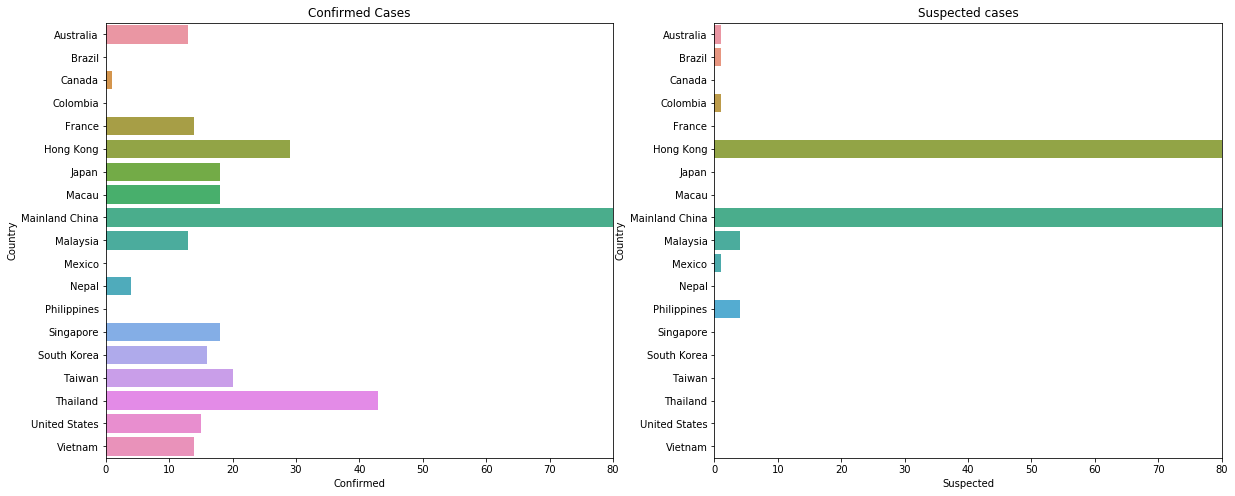

In [29]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.barplot(data=country,y='Country',x='Confirmed');
plt.title('Confirmed Cases')
plt.xlim(0,80)
plt.subplot(122)
sns.barplot(data=country,y='Country',x='Suspected');
plt.title('Suspected cases')
plt.xlim(0,80)

In [0]:
'Country','Confirmed', 'Suspected', 'Recovered', 'Deaths'

In [33]:
china=df[df['Country']=='Mainland China'].copy()
china.head()

,Unnamed: 0,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
4,4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0
5,5,Sichuan,Mainland China,1/21/2020,2.0,1.0,0.0,0.0


In [36]:
china_cases=china[['Province/State','Confirmed', 'Suspected', 'Recovered', 'Deaths']].groupby(['Province/State']).agg({'Confirmed':'sum','Suspected':'sum','Recovered':'sum','Deaths':'sum'})
china_cases.reset_index(inplace=True,)
china_cases.head(15)

,Province/State,Confirmed,Suspected,Recovered,Deaths
0,Anhui,238.0,35.0,0.0,0.0
1,Beijing,304.0,22.0,8.0,0.0
2,Chongqing,338.0,26.0,0.0,0.0
3,Fujian,102.0,70.0,0.0,1.0
4,Gansu,28.0,0.0,0.0,0.0
5,Guangdong,546.0,6.0,14.0,0.0
6,Guangxi,158.0,2.0,0.0,0.0
7,Guizhou,28.0,1.0,0.0,0.0
8,Hainan,102.0,97.0,0.0,0.0
9,Hebei,48.0,0.0,0.0,7.0


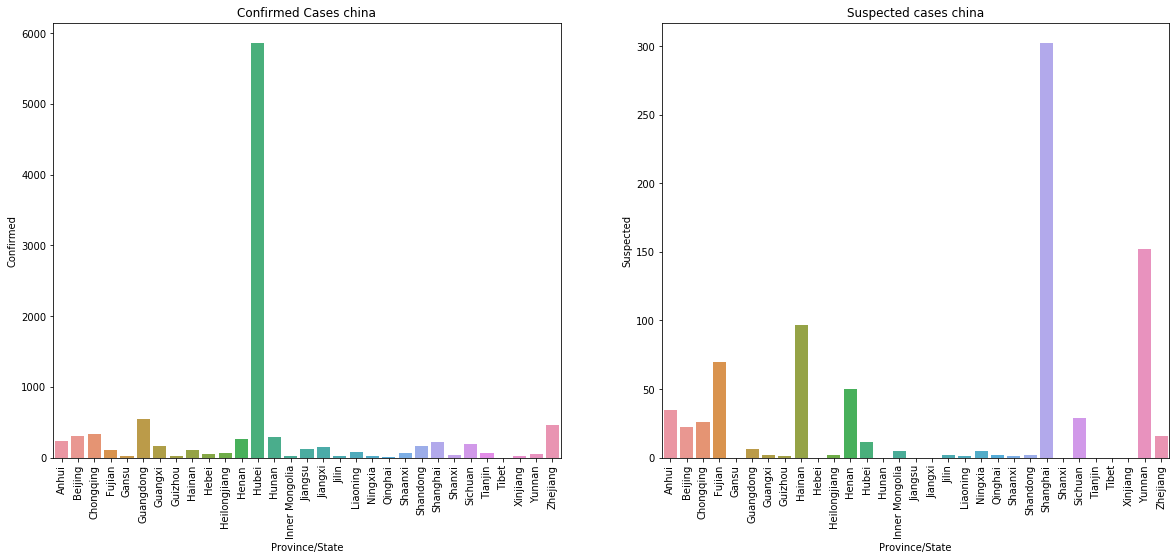

In [49]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.barplot(data=china_cases,x='Province/State',y='Confirmed');
plt.title('Confirmed Cases china')
plt.xticks(np.arange(31),china_cases['Province/State'].values,rotation=90);

plt.subplot(122)
sns.barplot(data=china_cases,x='Province/State',y='Suspected');
plt.title('Suspected cases china')
plt.xticks(np.arange(31),china_cases['Province/State'].values,rotation=90);


In [41]:
china_cases.shape[0]

31

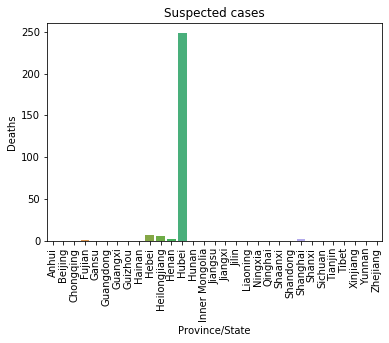

In [50]:
sns.barplot(data=china_cases,x='Province/State',y='Deaths');
plt.title('Suspected cases')
plt.xticks(np.arange(31),china_cases['Province/State'].values,rotation=90);

In [0]:
df1 = pd.read_csv('/content/corona/time_series_2019_ncov_confirmed.csv')

In [58]:
df1.head(5)

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,02/01/20 10:00,02/02/20 21:00,02/03/20 21:00,02/04/20 9:40,02/04/20 22:00,02/05/20 9:00,02/05/20 23:00,02/06/20 9:00,02/06/20 14:20,02/07/20 20:13,02/07/20 22:50,02/08/20 22:04,02/08/20 23:04,02/09/20 10:30,02/09/20 23:20
0,Anhui,Mainland China,31.82571,117.2264,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665,733,733,779,779,830
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297,315,315,326,326,337
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,247.0,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415,426,428,446,450,468
3,Fujian,Mainland China,26.07783,117.9895,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224,239,239,250,250,261
4,Gansu,Mainland China,36.06110,103.8343,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67,71,79,79,79,83


In [0]:
col_list=['1/21/20 22:00',
       '1/22/20 12:00', '1/23/20 12:00', '1/24/20 0:00', '1/24/20 12:00',
       '1/25/20 0:00', '1/25/20 12:00', '1/25/20 22:00', '1/26/20 11:00',
       '1/26/20 23:00', '1/27/20 9:00', '1/27/20 19:00', '1/27/20 20:30',
       '1/28/20 13:00', '1/28/20 18:00', '1/28/20 23:00', '1/29/20 13:30',
       '1/29/20 14:30', '1/29/20 21:00', '1/30/20 11:00', '1/31/20 14:00',
       '02/01/20 10:00', '02/02/20 21:00', '02/03/20 21:00', '02/04/20 9:40',
       '02/04/20 22:00', '02/05/20 9:00', '02/05/20 23:00', '02/06/20 9:00',
       '02/06/20 14:20', '02/07/20 20:13', '02/07/20 22:50', '02/08/20 22:04',
       '02/08/20 23:04', '02/09/20 10:30', '02/09/20 23:20']

In [0]:
df1['confirmed'] = df1[col_list].sum(axis=1)

In [66]:
df1.drop(col_list,axis=1,inplace=True)
df1.head()

,Province/State,Country/Region,Lat,Long,confirmed
0,Anhui,Mainland China,31.82571,117.2264,10876.0
1,Beijing,Mainland China,40.18238,116.4142,5465.0
2,Chongqing,Mainland China,30.05718,107.8740,7848.0
3,Fujian,Mainland China,26.07783,117.9895,4211.0
4,Gansu,Mainland China,36.06110,103.8343,1234.0


In [70]:
df.shape

(1704, 8)

In [0]:
df1.fillna(0,inplace=True)

In [0]:
df = px.data.gapminder()
fig = px.line_geo(df.query("year==2007"), locations="iso_alpha", color="Country", projection="orthographic",)
fig.show()


In [93]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df1, lat='Lat',lon="Long", hover_name="Province/State",color='Country/Region', projection="natural earth",)
fig.show()